In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_excel('/content/drive/MyDrive/complete-data-BAA-group-project.xlsx')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company ID     1239 non-null   int64  
 1   DSRI           1239 non-null   float64
 2   GMI            1239 non-null   float64
 3   AQI            1239 non-null   float64
 4   SGI            1239 non-null   float64
 5   DEPI           1239 non-null   float64
 6   SGAI           1239 non-null   float64
 7   ACCR           1239 non-null   float64
 8   LEVI           1239 non-null   float64
 9   Manipulater    1239 non-null   object 
 10  C-MANIPULATOR  1239 non-null   int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 106.6+ KB
        Company ID         DSRI          GMI          AQI          SGI  \
count    1239.0000  1239.000000  1239.000000  1239.000000  1239.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN    

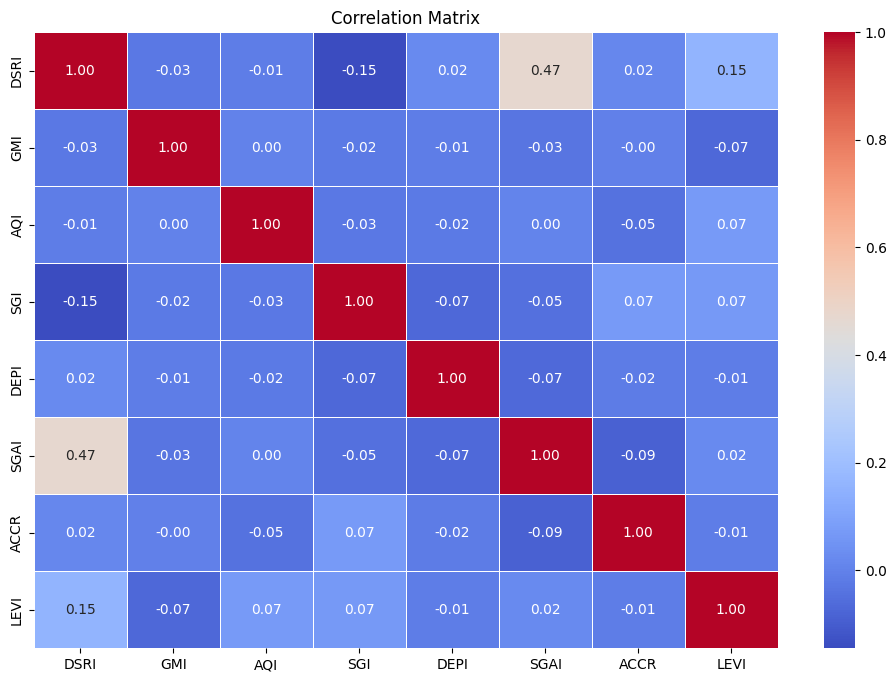

In [ ]:
# Check the first few rows
df.head()

# Summary of data types, missing values, and memory usage
information = df.info()

# Basic statistics (mean, std, min, max, etc.)
descriptive = df.describe(include='all')


print(descriptive)

print(information)

columns_to_drop = ['Company ID', 'Manipulater', 'C-MANIPULATOR']  # Specify columns to remove
df_filtered = df.drop(columns=columns_to_drop)

# Compute correlation matrix
correlation_matrix = df_filtered.corr()

print(correlation_matrix)

# Optional: Visualize with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define features and target
X = df[["DSRI", "GMI", "AQI", "SGI", "DEPI", "SGAI", "ACCR", "LEVI"]]
y = df["C-MANIPULATOR"]

# Train a Random Forest model to get feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
feature_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})

# Sort by importance and display
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Print feature importance values
print("Feature Importance Ranking:\n", feature_df)

# Get top 5 features
top_5_features = feature_df["Feature"].head(5).tolist()
print("\nTop 5 Features:", top_5_features)


Feature Importance Ranking:
   Feature  Importance
7    LEVI    0.192102
3     SGI    0.163638
0    DSRI    0.143616
6    ACCR    0.134727
5    SGAI    0.110348
2     AQI    0.100731
1     GMI    0.078796
4    DEPI    0.076041

Top 5 Features: ['LEVI', 'SGI', 'DSRI', 'ACCR', 'SGAI']


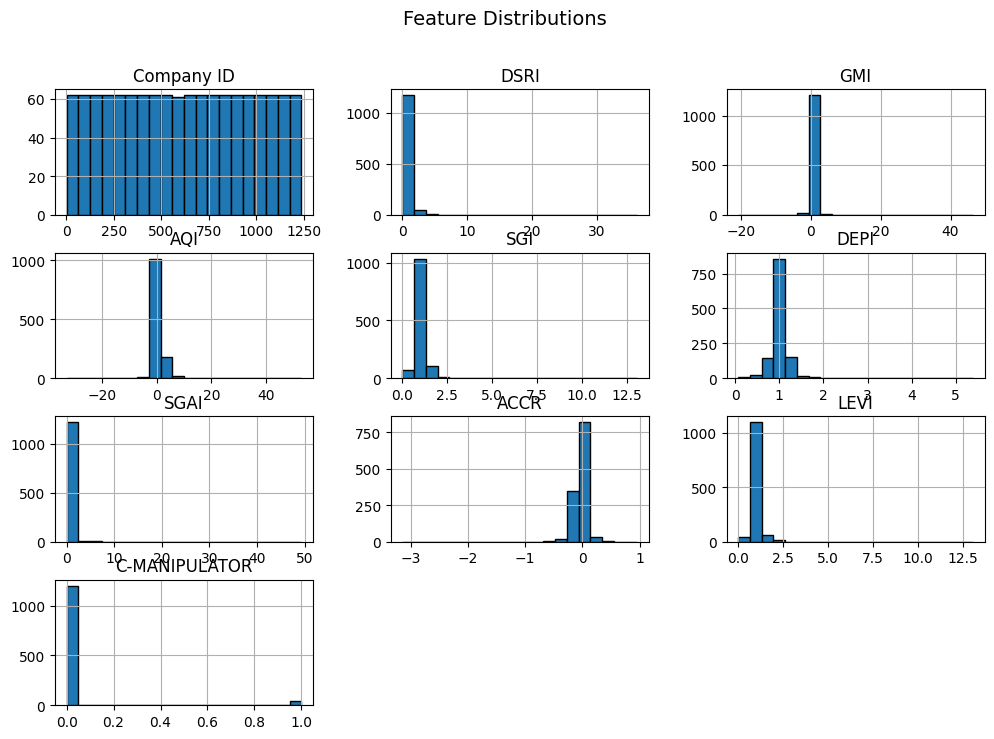

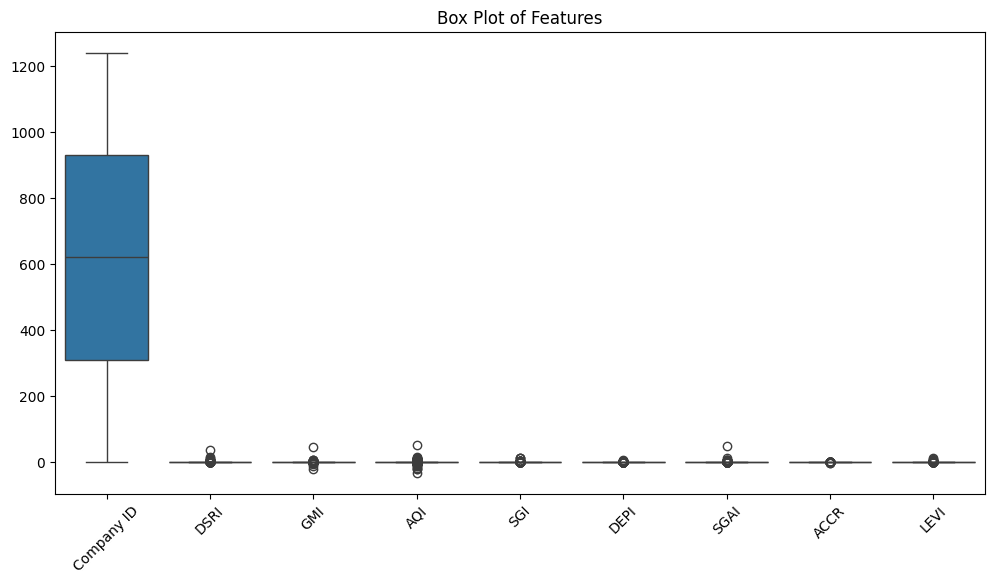

In [ ]:
# Plot histograms for all features
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["C-MANIPULATOR"]))  # Drop target variable for visualization
plt.xticks(rotation=45)
plt.title("Box Plot of Features")
plt.show()

Class Distribution:
 C-MANIPULATOR
0    1200
1      39
Name: count, dtype: int64


<ipython-input-5-4241f75250d2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=["blue", "red"])


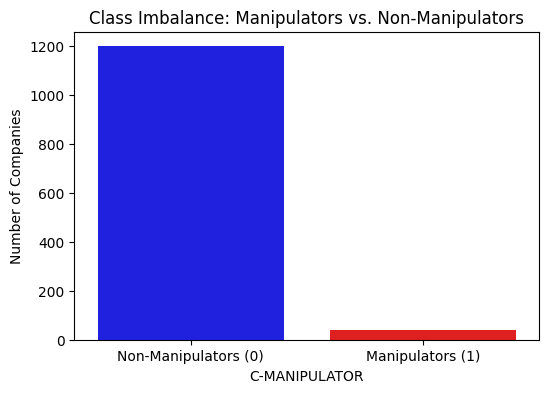

In [ ]:
# Count the number of manipulators (1) and non-manipulators (0)
class_counts = df["C-MANIPULATOR"].value_counts()
print("Class Distribution:\n", class_counts)

# Visualizing the class imbalance
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=["blue", "red"])
plt.xticks([0, 1], ["Non-Manipulators (0)", "Manipulators (1)"])
plt.ylabel("Number of Companies")
plt.title("Class Imbalance: Manipulators vs. Non-Manipulators")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Define features and target
X = df[["DSRI", "GMI", "AQI", "SGI", "DEPI", "SGAI", "ACCR", "LEVI"]]
y = df["C-MANIPULATOR"]

# Print initial class distribution
print("Original Class Distribution:\n", y.value_counts())

# Ensure "Yes" and "No" labels are correct
yes_label = y.unique()[0]  # Check what is stored as "Yes"
no_label = y.unique()[1]   # Check what is stored as "No"

# Count existing samples
num_yes = sum(y == yes_label)
num_no = sum(y == no_label)

# Ensure no division by zero
if num_yes == 0 or num_no == 0:
    raise ValueError("Dataset contains only one class. Check data labels!")

# Step 1: SMOTE Oversampling (Increasing "Yes" to 300)
smote = SMOTE(sampling_strategy={yes_label: 300}, random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Print new class distribution after SMOTE
print("After SMOTE:\n", y_smote.value_counts())

# Step 2: Undersampling "No" to 600
undersample = RandomUnderSampler(sampling_strategy={no_label: 600}, random_state=42)
X_final, y_final = undersample.fit_resample(X_smote, y_smote)

# Print final class distribution
print("Final Class Distribution:\n", y_final.value_counts())


Original Class Distribution:
 C-MANIPULATOR
0    1200
1      39
Name: count, dtype: int64
After SMOTE:
 C-MANIPULATOR
0    1200
1     300
Name: count, dtype: int64
Final Class Distribution:
 C-MANIPULATOR
0    600
1    300
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load dataset
file_path = "/content/drive/MyDrive/complete-data-BAA-group-project.xlsx"  # Update with actual file path
df = pd.read_excel(file_path)

# Separate YES (manipulators) and NO (non-manipulators)
df_yes = df[df["C-MANIPULATOR"] == 1]  # 39 entries (fixed)
df_no = df[df["C-MANIPULATOR"] == 0]  # 1200 entries

# Number of batches
num_batches = 15

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Define scoring metrics
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1": make_scorer(f1_score, zero_division=0),
    "roc_auc": make_scorer(roc_auc_score)
}

# Initialize dictionary to store model scores
model_scores = {model: {metric: [] for metric in scoring.keys()} for model in models.keys()}

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop to create 15 different batches
for batch in range(1, num_batches + 1):
    # Randomly sample 39 "NO" (non-manipulators) entries
    df_no_sampled = resample(df_no, n_samples=39, replace=False, random_state=batch)

    # Create a balanced batch (39 YES + 39 NO)
    df_batch = pd.concat([df_yes, df_no_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

    # Define features and target
    X_batch = df_batch[["DSRI", "GMI", "AQI", "SGI", "DEPI", "SGAI", "ACCR", "LEVI"]]
    y_batch = df_batch["C-MANIPULATOR"]

    print(f"\nBatch {batch} Performance:")

    # Training and evaluating each model on this batch
    for model_name, model in models.items():
        scores = cross_validate(model, X_batch, y_batch, cv=kf, scoring=scoring)

        # Computing mean for each metric
        for metric in scoring.keys():
            mean_score = np.mean(scores[f"test_{metric}"])
            model_scores[model_name][metric].append(mean_score)

        print(f"   {model_name}: Accuracy={model_scores[model_name]['accuracy'][-1]:.4f}, "
              f"Precision={model_scores[model_name]['precision'][-1]:.4f}, "
              f"Recall={model_scores[model_name]['recall'][-1]:.4f}, "
              f"F1-score={model_scores[model_name]['f1'][-1]:.4f}, "
              f"ROC AUC={model_scores[model_name]['roc_auc'][-1]:.4f}")

# Compute final average performance for each model across all 15 batches
final_results = {model: {metric: np.mean(scores) for metric, scores in metrics.items()}
                 for model, metrics in model_scores.items()}

# Display final model performance
print("\nFinal Model Performance (Averaged over 15 Batches):")
for model, metrics in final_results.items():
    print(f"\n{model}:")
    for metric, score in metrics.items():
        print(f"   {metric.capitalize()}: {score:.4f}")



Batch 1 Performance:
   Random Forest: Accuracy=0.8467, Precision=0.8260, Recall=0.8964, F1-score=0.8548, ROC AUC=0.8482
   Logistic Regression: Accuracy=0.7575, Precision=0.8483, Recall=0.6750, F1-score=0.7169, ROC AUC=0.7625
   Decision Tree: Accuracy=0.7300, Precision=0.7257, Recall=0.7393, F1-score=0.7298, ROC AUC=0.7304

Batch 2 Performance:
   Random Forest: Accuracy=0.7692, Precision=0.8169, Recall=0.7393, F1-score=0.7579, ROC AUC=0.7679
   Logistic Regression: Accuracy=0.7325, Precision=0.8607, Recall=0.5893, F1-score=0.6671, ROC AUC=0.7304
   Decision Tree: Accuracy=0.7067, Precision=0.7567, Recall=0.6357, F1-score=0.6830, ROC AUC=0.7054

Batch 3 Performance:
   Random Forest: Accuracy=0.7808, Precision=0.7806, Recall=0.7679, F1-score=0.7656, ROC AUC=0.7786
   Logistic Regression: Accuracy=0.7825, Precision=0.8429, Recall=0.6929, F1-score=0.7467, ROC AUC=0.7821
   Decision Tree: Accuracy=0.6892, Precision=0.6950, Recall=0.6821, F1-score=0.6727, ROC AUC=0.6857

Batch 4 Perform

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load dataset
file_path = "/content/drive/MyDrive/complete-data-BAA-group-project.xlsx"  # Update with actual file path
df = pd.read_excel(file_path)

# Separate YES (manipulators) and NO (non-manipulators)
df_yes = df[df["C-MANIPULATOR"] == 1]  # 39 entries (fixed)
df_no = df[df["C-MANIPULATOR"] == 0]  # 1200 entries

# Number of batches
num_batches = 15

# Define base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(solver="liblinear")
dt = DecisionTreeClassifier(random_state=42)

# Define the ensemble model using Voting Classifier (hard voting)
ensemble = VotingClassifier(
    estimators=[("Random Forest", rf), ("Logistic Regression", lr), ("Decision Tree", dt)],
    voting="hard"
)

# Define scoring metrics
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1": make_scorer(f1_score, zero_division=0),
    "roc_auc": make_scorer(roc_auc_score)
}

# Initialize dictionary to store ensemble scores
ensemble_scores = {metric: [] for metric in scoring.keys()}

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop to create 15 different batches
for batch in range(1, num_batches + 1):
    # Randomly sample 39 "NO" (non-manipulators) entries
    df_no_sampled = resample(df_no, n_samples=39, replace=False, random_state=batch)

    # Create a balanced batch (39 YES + 39 NO)
    df_batch = pd.concat([df_yes, df_no_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

    # Define features and target
    X_batch = df_batch[["DSRI", "GMI", "AQI", "SGI", "DEPI", "SGAI", "ACCR", "LEVI"]]
    y_batch = df_batch["C-MANIPULATOR"]

    print(f"\nBatch {batch} Performance:")

    # Train and evaluate the ensemble model
    scores = cross_validate(ensemble, X_batch, y_batch, cv=kf, scoring=scoring)

    # Compute mean for each metric
    for metric in scoring.keys():
        mean_score = np.mean(scores[f"test_{metric}"])
        ensemble_scores[metric].append(mean_score)

    # Print performance for the batch
    print(f"   Ensemble Model: Accuracy={ensemble_scores['accuracy'][-1]:.4f}, "
          f"Precision={ensemble_scores['precision'][-1]:.4f}, "
          f"Recall={ensemble_scores['recall'][-1]:.4f}, "
          f"F1-score={ensemble_scores['f1'][-1]:.4f}, "
          f"ROC AUC={ensemble_scores['roc_auc'][-1]:.4f}")

# Compute final average performance across all 15 batches
final_results = {metric: np.mean(scores) for metric, scores in ensemble_scores.items()}

# Display final ensemble performance
print("\nFinal Ensemble Model Performance (Averaged over 15 Batches):")
for metric, score in final_results.items():
    print(f"   {metric.capitalize()}: {score:.4f}")



Batch 1 Performance:
   Ensemble Model: Accuracy=0.8467, Precision=0.8361, Recall=0.8714, F1-score=0.8511, ROC AUC=0.8482

Batch 2 Performance:
   Ensemble Model: Accuracy=0.7575, Precision=0.8079, Recall=0.7143, F1-score=0.7460, ROC AUC=0.7554

Batch 3 Performance:
   Ensemble Model: Accuracy=0.7800, Precision=0.7761, Recall=0.7929, F1-score=0.7781, ROC AUC=0.7786

Batch 4 Performance:
   Ensemble Model: Accuracy=0.7292, Precision=0.7972, Recall=0.6679, F1-score=0.7000, ROC AUC=0.7339

Batch 5 Performance:
   Ensemble Model: Accuracy=0.8583, Precision=0.8861, Recall=0.8429, F1-score=0.8577, ROC AUC=0.8554

Batch 6 Performance:
   Ensemble Model: Accuracy=0.8092, Precision=0.8433, Recall=0.7893, F1-score=0.8011, ROC AUC=0.8071

Batch 7 Performance:
   Ensemble Model: Accuracy=0.8450, Precision=0.8620, Recall=0.8143, F1-score=0.8330, ROC AUC=0.8429

Batch 8 Performance:
   Ensemble Model: Accuracy=0.7442, Precision=0.7667, Recall=0.7143, F1-score=0.7357, ROC AUC=0.7446

Batch 9 Perform

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load dataset
file_path = "/content/drive/MyDrive/complete-data-BAA-group-project.xlsx"  # Update with actual path
df = pd.read_excel(file_path)

# Separate YES (manipulators) and NO (non-manipulators)
df_yes = df[df["C-MANIPULATOR"] == 1]  # 39 entries (fixed)
df_no = df[df["C-MANIPULATOR"] == 0]  # 1200 entries

# Number of batches
num_batches = 15

# Initialize model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Define scoring metrics
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1": make_scorer(f1_score, zero_division=0),
    "roc_auc": make_scorer(roc_auc_score)
}

# Initialize dictionary to store model scores
rf_scores = {metric: [] for metric in scoring.keys()}

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop to create 15 different batches
for batch in range(1, num_batches + 1):
    # Randomly sample 39 "NO" (non-manipulators) entries
    df_no_sampled = resample(df_no, n_samples=39, replace=False, random_state=batch)

    # Create a balanced batch (39 YES + 39 NO)
    df_batch = pd.concat([df_yes, df_no_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

    # Define features and target
    X_batch = df_batch[["DSRI", "GMI", "AQI", "SGI", "DEPI", "SGAI", "ACCR", "LEVI"]]
    y_batch = df_batch["C-MANIPULATOR"]

    print(f"\nBatch {batch} Performance:")

    # Train and evaluate Random Forest using cross-validation
    scores = cross_validate(random_forest, X_batch, y_batch, cv=kf, scoring=scoring, return_estimator=True)

    # Compute mean for each metric
    for metric in scoring.keys():
        mean_score = np.mean(scores[f"test_{metric}"])
        rf_scores[metric].append(mean_score)

    # Print batch performance
    print(f"   Accuracy={rf_scores['accuracy'][-1]:.4f}, "
          f"Precision={rf_scores['precision'][-1]:.4f}, "
          f"Recall={rf_scores['recall'][-1]:.4f}, "
          f"F1-score={rf_scores['f1'][-1]:.4f}, "
          f"ROC AUC={rf_scores['roc_auc'][-1]:.4f}")

# Compute final average performance across all 15 batches
final_results = {metric: np.mean(scores) for metric, scores in rf_scores.items()}

# Display final model performance
print("\nFinal Random Forest Model Performance (Averaged over 15 Batches):")
for metric, score in final_results.items():
    print(f"   {metric.capitalize()}: {score:.4f}")


Batch 1 Performance:
   Accuracy=0.8467, Precision=0.8260, Recall=0.8964, F1-score=0.8548, ROC AUC=0.8482

Batch 2 Performance:
   Accuracy=0.7692, Precision=0.8169, Recall=0.7393, F1-score=0.7579, ROC AUC=0.7679

Batch 3 Performance:
   Accuracy=0.7808, Precision=0.7806, Recall=0.7679, F1-score=0.7656, ROC AUC=0.7786

Batch 4 Performance:
   Accuracy=0.7542, Precision=0.7883, Recall=0.7393, F1-score=0.7489, ROC AUC=0.7571

Batch 5 Performance:
   Accuracy=0.9217, Precision=0.9556, Recall=0.8964, F1-score=0.9227, ROC AUC=0.9196

Batch 6 Performance:
   Accuracy=0.7950, Precision=0.7829, Recall=0.8429, F1-score=0.8032, ROC AUC=0.7964

Batch 7 Performance:
   Accuracy=0.8583, Precision=0.8700, Recall=0.8393, F1-score=0.8478, ROC AUC=0.8571

Batch 8 Performance:
   Accuracy=0.7567, Precision=0.7800, Recall=0.7357, F1-score=0.7416, ROC AUC=0.7554

Batch 9 Performance:
   Accuracy=0.8433, Precision=0.8279, Recall=0.8679, F1-score=0.8456, ROC AUC=0.8429

Batch 10 Performance:
   Accuracy=0.